In [1]:
import pandas as pd
df=pd.read_csv(r"C:\MachineLearning\dataset\cars_clus.CSV");
df.head(5),'\n\t',df.size

(  manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
 0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
 1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
 2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
 3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
 4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   
 
     width   length curb_wgt fuel_cap     mpg lnsales  partition  
 0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
 1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
 2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
 3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
 4  68.200  178.000    2.998   16.400  27.000   3.015        0.0  ,
 '\n\t',
 2544)

In [2]:
print(df.size)
data=df.replace('$null$',None);
data=data.dropna(how='any');
data.reset_index(drop=True)
data.size

2544


2512

In [3]:
feature=data[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
print(feature.head())
from sklearn.preprocessing import LabelEncoder
#LE=LabelEncoder().fit([]);

  engine_s horsepow wheelbas   width   length curb_wgt fuel_cap     mpg
0    1.800  140.000  101.200  67.300  172.400    2.639   13.200  28.000
1    3.200  225.000  108.100  70.300  192.900    3.517   17.200  25.000
2    3.200  225.000  106.900  70.600  192.000    3.470   17.200  26.000
3    3.500  210.000  114.600  71.400  196.600    3.850   18.000  22.000
4    1.800  150.000  102.600  68.200  178.000    2.998   16.400  27.000


In [4]:
from sklearn.preprocessing import MinMaxScaler
x=feature.values
MM=MinMaxScaler().fit_transform(x);
MM

array([[0.11428571, 0.21518987, 0.18655098, ..., 0.20233886, 0.13364055,
        0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , ..., 0.44112048, 0.31797235,
        0.33333333],
       [0.31428571, 0.43037975, 0.31019523, ..., 0.42833832, 0.31797235,
        0.36666667],
       ...,
       [0.2       , 0.28607595, 0.26681128, ..., 0.37095458, 0.35023041,
        0.33333333],
       [0.18571429, 0.45822785, 0.26681128, ..., 0.46396519, 0.37788018,
        0.26666667],
       [0.27142857, 0.36962025, 0.37527115, ..., 0.46369323, 0.49769585,
        0.3       ]])

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
agg=AgglomerativeClustering().fit(MM,MM);
agg

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [6]:
feature['class']=agg.labels_
feature.columns

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt',
       'fuel_cap', 'mpg', 'class'],
      dtype='object')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(data=feature,x='length',y='mpg',hue='class');
plt.show()

<Figure size 640x480 with 1 Axes>

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


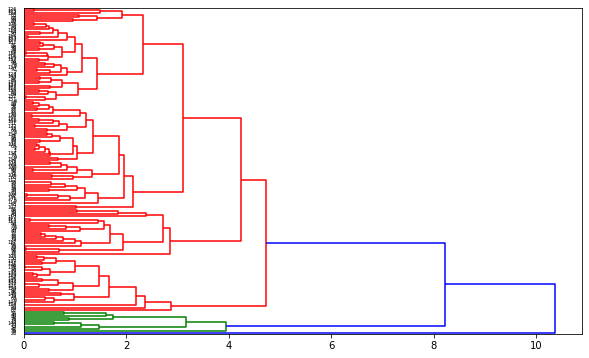

In [70]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
plt.figure(figsize=(10,6));
dist=distance_matrix(MM,MM);
z=hierarchy.linkage(dist,'average');
dent=hierarchy.dendrogram(z,orientation='right')
plt.show()

In [9]:
import numpy as np
from scipy.spatial.distance import euclidean
x=feature[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt',
       'fuel_cap', 'mpg']].values.astype(float);
leng=len(x)
y=feature['class'].values.astype(int)
print(x.shape,y.shape,leng)
d=np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        d[i,j]=euclidean(x[i,0],x[j,1])
d.shape

(157, 8) (157,) 157


(157, 157)

[0 0 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 2 2 2 0 2 0 0 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2
 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0]


array([1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

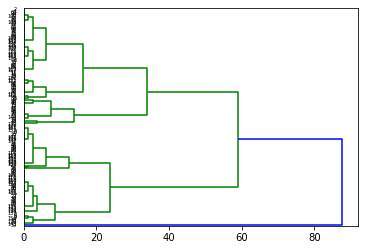

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
agg=AgglomerativeClustering(n_clusters=3,linkage='average').fit(d,d)
print(agg.labels_)
z=hierarchy.linkage(d,'complete');
g=hierarchy.dendrogram(z,orientation='right');
f=fcluster(z,3,criterion='maxclust');
f

'[1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1\n 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0\n 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1\n 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1\n 1 1 1 1 1 1 1 0 0]'

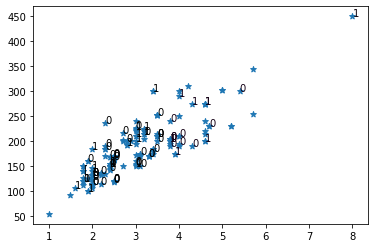

In [73]:
import matplotlib.pyplot as plt
from scipy import ndimage 
y=str(feature['class'].values.astype(int))
for i in range(leng):
    plt.text(x[i,0],x[i,1],y[i],
            color=plt.cm.nipy_spectral(agg.labels_[i])
            );
plt.scatter(x[:,0],x[:,1],marker='*')
y

In [74]:
MM.shape

(157, 8)

In [75]:
from scipy.spatial.distance import euclidean
leng=len(MM)
d=np.zeros([leng,leng]);
for i in range(leng):
    for j in range(leng):
        d[i,j]=euclidean(MM[i],MM[j])
d

array([[0.        , 0.5606135 , 0.54368416, ..., 0.38895601, 0.56284388,
        0.65836237],
       [0.5606135 , 0.        , 0.04895307, ..., 0.23657439, 0.21138262,
        0.23130867],
       [0.54368416, 0.04895307, 0.        , ..., 0.22983209, 0.20926095,
        0.23692662],
       ...,
       [0.38895601, 0.23657439, 0.22983209, ..., 0.        , 0.24477789,
        0.28947548],
       [0.56284388, 0.21138262, 0.20926095, ..., 0.24477789, 0.        ,
        0.21589837],
       [0.65836237, 0.23130867, 0.23692662, ..., 0.28947548, 0.21589837,
        0.        ]])

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


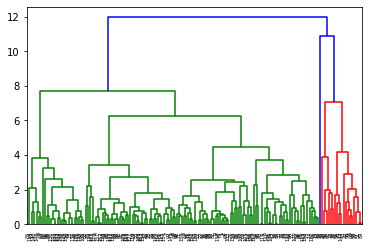

In [76]:
z=hierarchy.linkage(d,"complete")
dend=hierarchy.dendrogram(z);

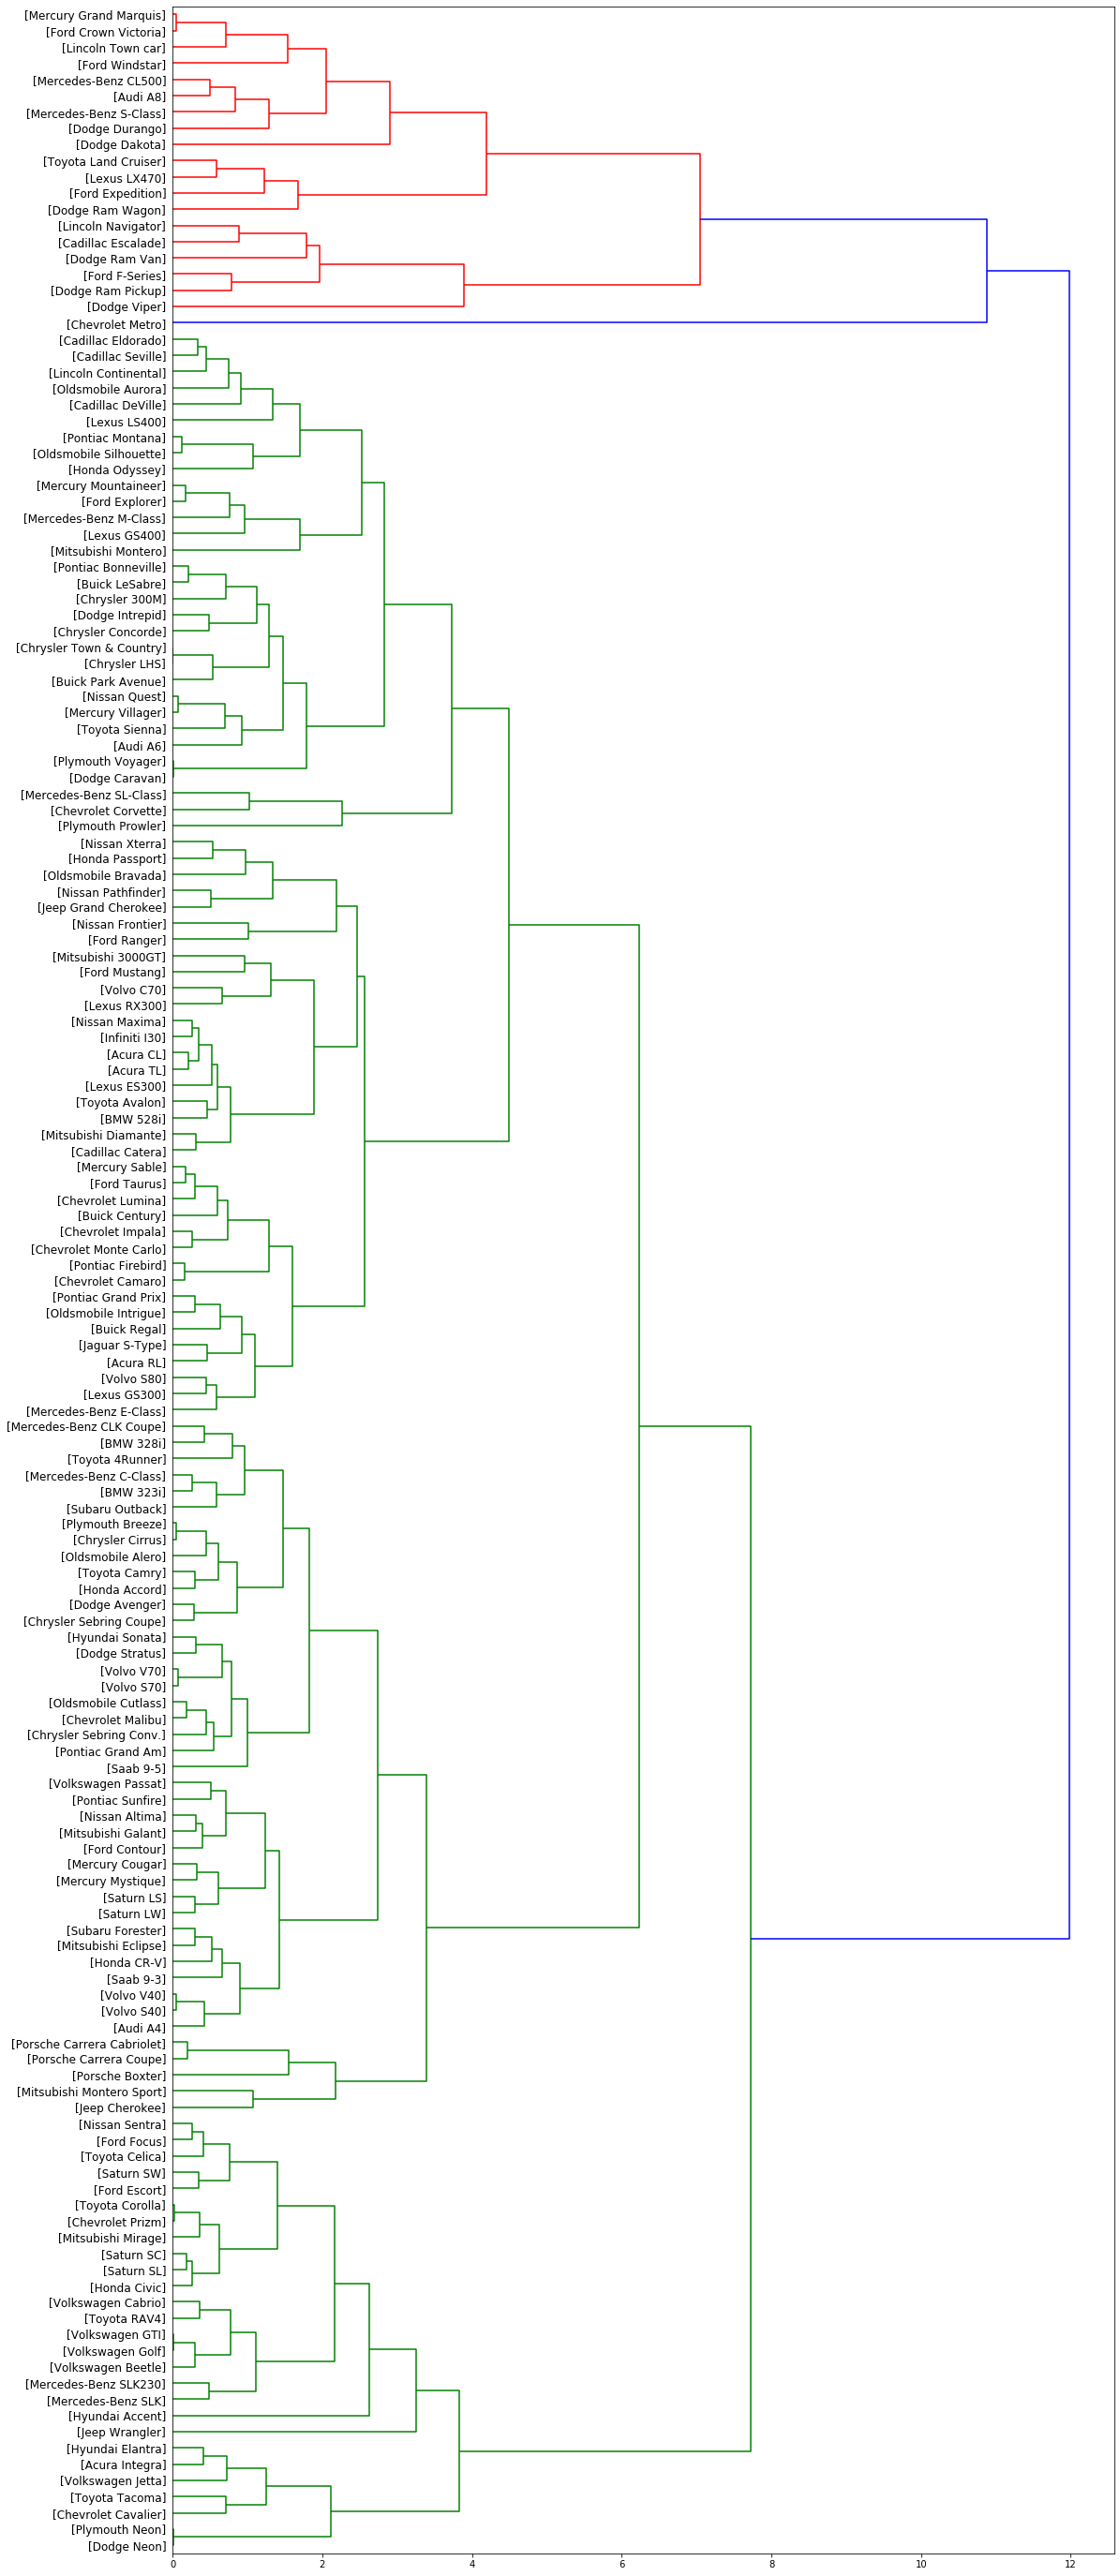

In [77]:
import pylab
m=df['manufact'].values;
n=df['model'].values;
fig=pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]'%(m[id],n[id]);
dendro=hierarchy.dendrogram(z,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should 

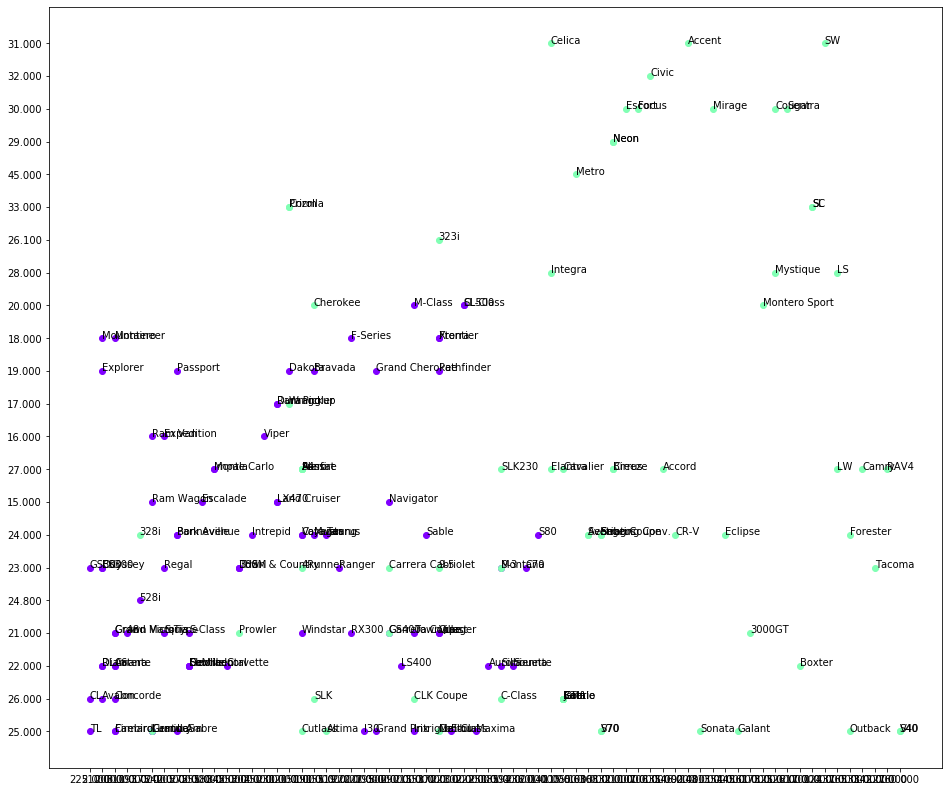

In [114]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
label_size=max(agg.labels_)+1;
color=cm.rainbow(np.linspace(0,1,label_size));
cluster=list(range(0,label_size))
feature['model']=data['model']
plt.figure(figsize=(16,14))
for c,l in zip(color,cluster):
    subset=feature[feature['class']==l]
    for i in subset.index:
        plt.text(subset.horsepow[i],subset.mpg[i],str(feature['model'][i]));
    plt.scatter(subset.horsepow, subset.mpg, c=c);
plt.show()